In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import ast

19


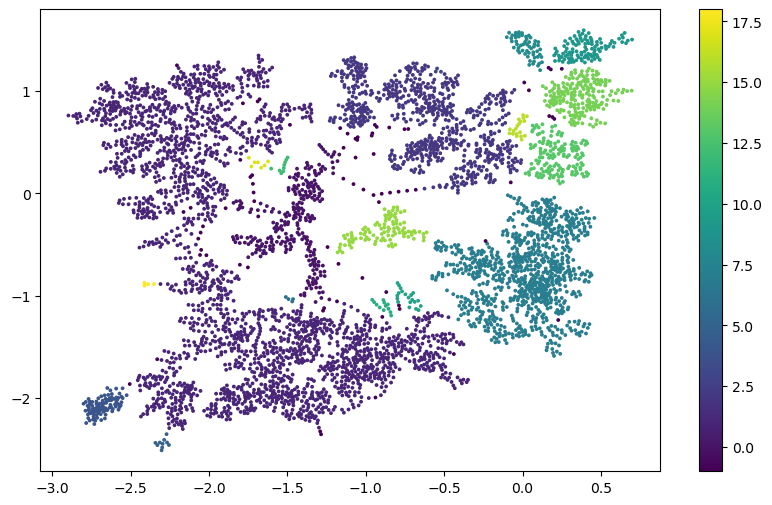

In [187]:
node_coord=pd.read_csv('nodes.csv')
edges=pd.read_csv('edges.csv')
edges = list(zip(edges['source'], edges['target']))
#node_coord = list(zip(node_coord['pos'][0], node_coord['pos'][1]))
# node_coord['pos'].apply(type)
node_coord['pos']

node_coord['pos'] = node_coord['pos'].apply(lambda s: np.array(ast.literal_eval(s.replace('array', ''))))
clist = np.vstack(node_coord['pos'].values)
clist
dbscan = DBSCAN(eps=0.06, min_samples=4)
clusters = dbscan.fit_predict(clist)
labels = dbscan.labels_
print(len(set(labels)) - (1 if -1 in labels else 0))
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clist[:, 0], clist[:, 1], c=clusters, cmap='viridis', s=3)
plt.colorbar(scatter)
plt.show()

In [52]:
# plt.figure(figsize=(10, 6))
# plt.scatter(clist[:, 0], clist[:, 1], s=10)
#plt.show()

In [1]:
# def plot_k_distance_graph(X, k):
#     neigh = NearestNeighbors(n_neighbors=k)
#     neigh.fit(X)
#     distances, _ = neigh.kneighbors(X)
#     distances = np.sort(distances[:, k-1])
#     plt.figure(figsize=(10, 6))
#     plt.plot(distances)
#     plt.xlabel('Points')
#     plt.ylabel(f'{k}-th nearest neighbor distance')
#     plt.title('K-distance Graph')
#     plt.ylim(0, 0.1)
#     plt.show()

# plot_k_distance_graph(clist, k=5)

In [2]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=8) 
labels = clusterer.fit_predict(X_hdbscan)
clist["cluster"] = labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# unique_labels = set(labels)
# colors = plt.cm.get_cmap("tab20", len(unique_labels))

# plt.figure(figsize=(8,6))

# for k, col in zip(unique_labels, colors(np.arange(len(unique_labels)))):
#     if k == -1:
#         col = (0, 0, 0, 1)  # black for noise
    
#     mask = labels == k
#     xy = X_hdbscan[mask]
    
#     plt.scatter(xy[:,0], xy[:,1], c=[col], edgecolor='k', s=10, label=f"Cluster {k}" if k != -1 else "Noise")

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
from sklearn.cluster import DBSCAN
X_dbscan = low_cn[["PC1", "PC2"]].values
db = DBSCAN(eps=0.19, min_samples=10).fit(X_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for k, col in zip(unique_labels, colors(np.arange(len(unique_labels)))):
    if k == -1:
        col = (0, 0, 0, 1)  # black for noise

    class_member_mask = (labels == k)
    xy = X_dbscan[class_member_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=col,
        markeredgecolor='k',
        markersize=3)